In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dropout,Dense,Embedding,LSTM,Bidirectional
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_20newsgroups
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from tensorflow import keras
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

In [2]:
news_train=fetch_20newsgroups(subset='train')
news_test=fetch_20newsgroups(subset='test')

In [29]:
len(news_train)

print(len(news_train.data))

print(news_train.target_names)
label_names=news_train.target_names

11314
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [47]:
train_tokenizer=Tokenizer()
train_tokenizer.fit_on_texts(news_train.data)

X_train=train_tokenizer.texts_to_sequences(news_train.data)
X_train=pad_sequences(X_train,maxlen=400)
Y_train=to_categorical(news_train.target)
print(Y_train[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [48]:
test_tokenizer=Tokenizer()
test_tokenizer.fit_on_texts(news_test.data)

X_test=test_tokenizer.texts_to_sequences(news_test.data)
X_test=pad_sequences(X_test,maxlen=400)
Y_test=to_categorical(news_test.target)
print(Y_test[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [65]:
voc_size  =   len(train_tokenizer.word_index) +1

model=Sequential()
model.add(Embedding(voc_size,128))
model.add(Bidirectional(LSTM(128,dropout=0.2)))
model.add(Dense(len(news_train.target_names),activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

#model=keras.models.load_model("sentiment_model")

print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, None, 128)         17170304  
                                                                 
 bidirectional (Bidirectiona  (None, 256)              263168    
 l)                                                              
                                                                 
 dense_5 (Dense)             (None, 20)                5140      
                                                                 
Total params: 17,438,612
Trainable params: 17,438,612
Non-trainable params: 0
_________________________________________________________________
None


In [56]:
model.fit(X_train,Y_train,batch_size=64,epochs=6)



Epoch 1/6
177/177 [==============================] - 207s 1s/step - loss: 2.7576 - accuracy: 0.1665
Epoch 2/6
177/177 [==============================] - 212s 1s/step - loss: 1.7994 - accuracy: 0.4413
Epoch 3/6
177/177 [==============================] - 191s 1s/step - loss: 0.9938 - accuracy: 0.6963
Epoch 4/6
177/177 [==============================] - 197s 1s/step - loss: 0.4827 - accuracy: 0.8598
Epoch 5/6
177/177 [==============================] - 196s 1s/step - loss: 0.2631 - accuracy: 0.9275
Epoch 6/6
177/177 [==============================] - 166s 940ms/step - loss: 0.1917 - accuracy: 0.9496


In [57]:
#model.evaluate(X_test,Y_test)
model.save('sentiment_model')

INFO:tensorflow:Assets written to: sentiment_model\assets


INFO:tensorflow:Assets written to: sentiment_model\assets


In [60]:
Y_pred=model.predict(X_train)
#Y_pred=model.predict(X_test)


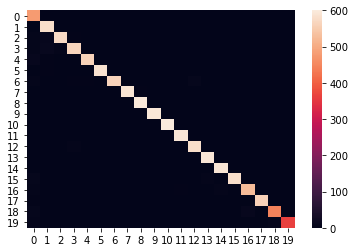

                          precision    recall  f1-score   support

             alt.atheism       0.87      0.99      0.93       480
           comp.graphics       0.95      0.99      0.97       584
 comp.os.ms-windows.misc       0.99      0.97      0.98       591
comp.sys.ibm.pc.hardware       0.98      0.96      0.97       590
   comp.sys.mac.hardware       0.99      0.97      0.98       578
          comp.windows.x       0.99      0.99      0.99       593
            misc.forsale       0.99      0.96      0.98       585
               rec.autos       1.00      0.99      0.99       594
         rec.motorcycles       0.99      1.00      0.99       598
      rec.sport.baseball       1.00      0.99      1.00       597
        rec.sport.hockey       1.00      1.00      1.00       600
               sci.crypt       0.99      0.99      0.99       595
         sci.electronics       0.98      0.98      0.98       591
                 sci.med       0.98      0.99      0.99       594
         

In [61]:
DEFAULT_CLASS=0
Y_pred2 = [np.argmax(x) if np.max(x) >= 0.5 else DEFAULT_CLASS for x in Y_pred]

#Y_pred2=np.argmax(Y_pred, axis=1)
#Y_test2=np.argmax(Y_test, axis=1)
Y_train2=np.argmax(Y_train,axis=1)
cm = confusion_matrix(Y_train2, Y_pred2)
#cm = confusion_matrix(Y_test2, Y_pred2)

sns.heatmap(cm)
plt.show()

print(classification_report(Y_train2,Y_pred2,target_names=label_names))
#print(classification_report(Y_test2,Y_pred2,target_names=label_names))